###  Is there a relationship between water salinity & water temperature? 
Can you predict the water temperature based on salinity?

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [4]:
# Import Bottle data
pd.options.display.max_columns = 100
bottle = pd.read_csv('bottle.csv', low_memory = False)
bottle.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,IncTim,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,NaN,NaN,3,1.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,0.0,10.50,10.50,33.440,25.64,233.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,8.0,10.46,10.46,33.440,25.65,232.5,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,10.0,10.46,10.46,33.437,25.65,232.8,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,19.0,10.45,10.45,33.420,25.64,234.1,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,20.0,10.45,10.45,33.421,25.64,234.0,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Import Cast data
cast = pd.read_csv('cast.csv', low_memory = False)
cast.head()

,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Distance,Date,Year,Month,Julian_Date,Julian_Day,Time,Lat_Dec,Lat_Deg,Lat_Min,Lat_Hem,Lon_Dec,Lon_Deg,Lon_Min,Lon_Hem,Rpt_Line,St_Line,Ac_Line,Rpt_Sta,St_Station,Ac_Sta,Bottom_D,Secchi,ForelU,Ship_Name,Ship_Code,Data_Type,Order_Occ,Event_Num,Cruz_Leg,Orig_Sta_ID,Data_Or,Cruz_Num,IntChl,IntC14,Inc_Str,Inc_End,PST_LAN,Civil_T,TimeZone,Wave_Dir,Wave_Ht,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
0,1,1949-03-01-C-31CR,194903,19490305400560,5400560,19-4903CR-HY-060-0930-05400560,054.0 056.0,1,NST,NaN,03/01/1949,1949,3,17958,60,09:30:00,38.833333,38,50.0,N,-124.083333,-124,5.0,W,54.0,54.0,53.8,56.0,56.0,55.8,NaN,NaN,NaN,CREST,31CR,HY,NaN,1.0,NaN,054 56,NaN,4903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1,2,1949-03-01-C-31CR,194903,19490305200750,5200750,19-4903CR-HY-060-2112-05200750,052.0 075.0,1,NST,NaN,03/01/1949,1949,3,17958,60,21:12:00,38.583333,38,35.0,N,-125.800000,-125,48.0,W,52.0,52.0,51.5,75.0,75.0,75.1,NaN,NaN,NaN,CREST,31CR,HY,NaN,2.0,NaN,052 75,NaN,4903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN
2,3,1949-03-01-C-31CR,194903,19490305100850,5100850,19-4903CR-HY-061-0354-05100850,051.0 085.0,1,NST,NaN,03/02/1949,1949,3,17959,61,03:54:00,38.475000,38,28.5,N,-126.666666,-126,40.0,W,51.0,51.0,50.3,85.0,85.0,84.7,NaN,NaN,NaN,CREST,31CR,HY,NaN,3.0,NaN,051 85,NaN,4903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,5.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN
3,4,1949-03-01-C-31CR,194903,19490305000950,5000950,19-4903CR-HY-061-1042-05000950,050.0 095.0,1,NST,NaN,03/02/1949,1949,3,17959,61,10:42:00,38.333333,38,20.0,N,-127.516666,-127,31.0,W,50.0,50.0,49.2,95.0,95.0,94.3,NaN,NaN,NaN,CREST,31CR,HY,NaN,4.0,NaN,050 95,NaN,4903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,8.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
4,5,1949-03-01-C-31CR,194903,19490305001040,5001040,19-4903CR-HY-061-1706-05001040,050.0 104.0,1,NST,NaN,03/02/1949,1949,3,17959,61,17:06:00,38.233333,38,14.0,N,-128.366666,-128,22.0,W,50.0,50.0,48.0,104.0,104.0,103.7,NaN,NaN,NaN,CREST,31CR,HY,NaN,5.0,NaN,050 104,NaN,4903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,13.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN


In [7]:
print(bottle.shape)
print(cast.shape)

(864863, 74)
(34404, 61)


In [8]:
# Check for nulls
pd.options.display.max_rows = 100
bottle.isnull().sum()*100/len(bottle)

Cst_Cnt                 0.000000
Btl_Cnt                 0.000000
Sta_ID                  0.000000
Depth_ID                0.000000
Depthm                  0.000000
T_degC                  1.267600
Salnty                  5.475318
O2ml_L                 19.501586
STheta                  6.092179
O2Sat                  23.540029
Oxy_µmol/Kg            23.540723
BtlNum                 86.279099
RecInd                  0.000000
T_prec                  1.267600
T_qual                 97.325935
S_prec                  5.475318
S_qual                 91.338050
P_qual                 22.096910
O_qual                 78.646791
SThtaq                 92.389199
O2Satq                 74.817168
ChlorA                 73.952869
Chlqua                 26.096272
Phaeop                 73.952984
Phaqua                 26.095809
PO4uM                  52.210119
PO4q                   47.762131
SiO3uM                 59.058140
SiO3qu                 40.930991
NO2uM                  60.967691
NO2q      

In [9]:
# If columns have more than 10% missing data, drop them 
bottle = bottle[bottle.columns[bottle.isnull().mean() < 0.1]]
bottle.isnull().sum()*100/len(bottle)

Cst_Cnt       0.000000
Btl_Cnt       0.000000
Sta_ID        0.000000
Depth_ID      0.000000
Depthm        0.000000
T_degC        1.267600
Salnty        5.475318
STheta        6.092179
RecInd        0.000000
T_prec        1.267600
S_prec        5.475318
NH3q          6.540227
C14A1q        1.879835
C14A2q        1.877754
DarkAq        2.823915
MeanAq        2.824031
R_Depth       0.000000
R_TEMP        1.267600
R_POTEMP      5.324196
R_SALINITY    5.475318
R_SIGMA       6.111488
R_SVA         6.101660
R_DYNHT       5.394727
R_PRES        0.000000
dtype: float64

In [10]:
bottle.shape

(864863, 24)

In [11]:
cast.isnull().sum()*100/len(cast)

Cst_Cnt         0.000000
Cruise_ID       0.000000
Cruise          0.000000
Cruz_Sta        0.000000
DbSta_ID        0.000000
Cast_ID         0.000000
Sta_ID          0.000000
Quarter         0.000000
Sta_Code        0.000000
Distance       42.698523
Date            0.000000
Year            0.000000
Month           0.000000
Julian_Date     0.000000
Julian_Day      0.000000
Time            0.941751
Lat_Dec         0.000000
Lat_Deg         0.000000
Lat_Min         0.000000
Lat_Hem         0.000000
Lon_Dec         0.000000
Lon_Deg         0.000000
Lon_Min         0.000000
Lon_Hem         0.000000
Rpt_Line        0.000000
St_Line         0.000000
Ac_Line         0.000000
Rpt_Sta         0.000000
St_Station      0.000000
Ac_Sta          0.000000
Bottom_D        6.630043
Secchi         84.702360
ForelU         93.962911
Ship_Name       4.912220
Ship_Code       0.000000
Data_Type       0.000000
Order_Occ      71.067318
Event_Num       0.008720
Cruz_Leg       95.744681
Orig_Sta_ID     0.000000


In [12]:
# Check if Salnty and R_SALINITY are the same
bottle['Salnty'].equals(bottle['R_SALINITY'])

False

In [13]:
sum(bottle['Salnty'].fillna(0) - bottle['R_SALINITY'].fillna(0))

44.82139999999968

In [14]:
len(bottle.columns)

24

In [15]:
data = bottle[['T_degC','Salnty']]
data.head()

,T_degC,Salnty
0,10.50,33.440
1,10.46,33.440
2,10.46,33.437
3,10.45,33.420
4,10.45,33.421


In [16]:
data.describe()

,T_degC,Salnty
count,853900.000000,817509.000000
mean,10.799677,33.840350
std,4.243825,0.461843
min,1.440000,28.431000
25%,7.680000,33.488000
50%,10.060000,33.863000
75%,13.880000,34.196900
max,31.140000,37.034000


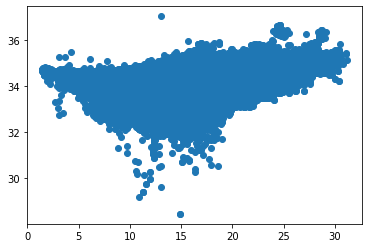

In [17]:
plt.scatter(x = data['T_degC'], y = data['Salnty'])

In [18]:
data.corr()

,T_degC,Salnty
T_degC,1.000000,-0.505266
Salnty,-0.505266,1.000000


Not the greatest linearity shown here

C:\Users\tanusha.goswami\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salnty', ylabel='Density'>

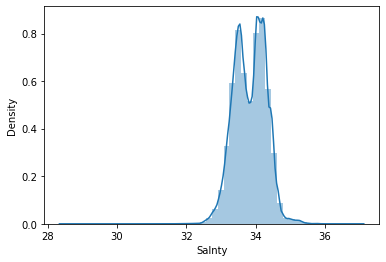

In [20]:
sns.distplot(data['Salnty'].dropna())

Above distribution plot shows that salinity is not normal so linear regression will not be a good fit

In [21]:
data = data.dropna()
data.shape

(814247, 2)

In [22]:
def evaluate_linear_model(x_test, y_test, y_pred, y_predicted_train, model):
    plt.figure(figsize = (15,5))
    plt.subplot(1,2,1)
    plt.scatter(x_test, y_test,  color='gray')
    plt.plot(x_test, y_pred, color='red', linewidth=2)
    plt.title('Linear Model Plot')
    plt.subplot(1,2,2)
    sns.residplot(y_predicted_train, (y_predicted_train - y_train).reshape(-1,1) , color="g")
    plt.title('Residual Plot')
    plt.show()
    print('Intercept: ',model.intercept_)
    print('Coefficient: ', model.coef_)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('R^2 value: ', model.score(x_train,y_train))
    print('Adjusted R^2 value: ', 1 - (1-model.score(x_train,y_train))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1))

C:\Users\tanusha.goswami\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


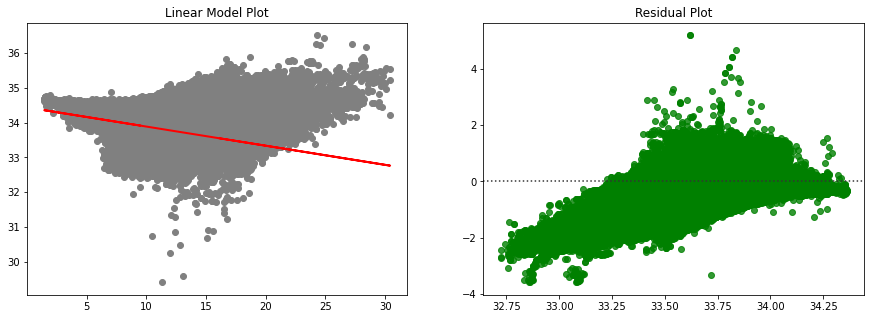

Intercept:  [34.44034901]
Coefficient:  [[-0.05513459]]
Mean Absolute Error: 0.2794888038088493
Mean Squared Error: 0.15804824264926365
Root Mean Squared Error: 0.39755281743343696
R^2 value:  0.254625946852579
Adjusted R^2 value:  0.2546248025790535


In [23]:
X = data['T_degC'].values.reshape(-1,1)
y = data['Salnty'].values.reshape(-1,1)

# Split data into train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LinearRegression().fit(x_train, y_train)
y_pred = model.predict(x_test)
y_predicted_train = model.predict(x_train)
evaluate_linear_model(x_test, y_test, y_pred,  y_predicted_train,model)

We can see hear that the residual plot has a trendline. Model is not a good one

C:\Users\tanusha.goswami\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


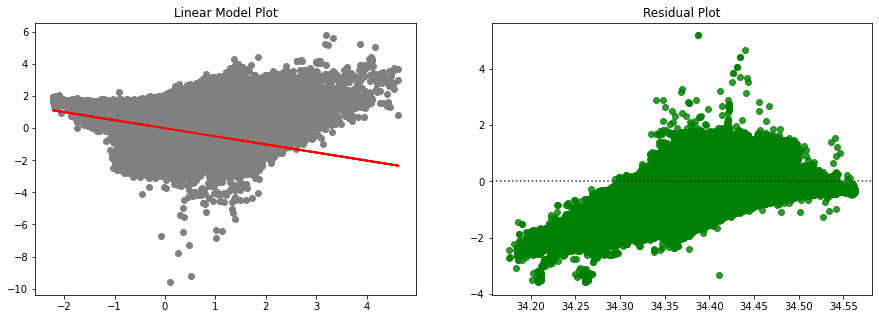

Intercept:  [-9.74621961e-15]
Coefficient:  [[-0.50460474]]
Mean Absolute Error: 0.60564076079286
Mean Squared Error: 0.7420371817833064
Root Mean Squared Error: 0.8614158007508954
R^2 value:  -7270.937465461322
Adjusted R^2 value:  -7270.94862909854


In [24]:
# Standardising values to see if better results pop up
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
x_train_standardised = scaler.fit_transform(x_train)
y_train_standardised = scaler.fit_transform(y_train)
x_test_standardised = scaler.fit_transform(x_test)
y_test_standardised = scaler.fit_transform(y_test)

model_standardised = LinearRegression().fit(x_train_standardised, y_train_standardised)
y_pred_standardised = model_standardised.predict(x_test_standardised)

y_predicted_train_standardised = model.predict(x_train_standardised)
evaluate_linear_model(x_test_standardised, y_test_standardised, y_pred_standardised, y_predicted_train_standardised,model_standardised)


C:\Users\tanusha.goswami\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


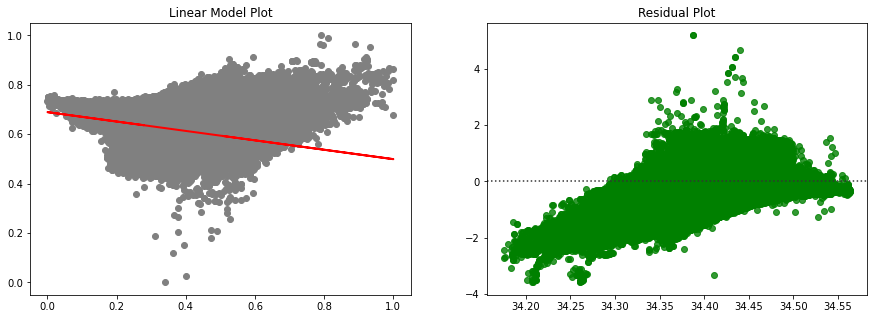

Intercept:  [0.68928922]
Coefficient:  [[-0.19034026]]
Mean Absolute Error: 0.0408293416620606
Mean Squared Error: 0.00316324229767463
Root Mean Squared Error: 0.056242708840121045
R^2 value:  -5821.005857573188
Adjusted R^2 value:  -5821.014795323489


In [25]:
normaliser = preprocessing.MinMaxScaler()
# Fit your data on the scaler object
x_train_normalised = normaliser.fit_transform(x_train)
y_train_normalised = normaliser.fit_transform(y_train)
x_test_normalised = normaliser.fit_transform(x_test)
y_test_normalised = normaliser.fit_transform(y_test)

model_normalised = LinearRegression().fit(x_train_normalised, y_train_normalised)
y_pred_normalised = model_normalised.predict(x_test_normalised)
y_predicted_train_normalised = model.predict(x_train_standardised)
evaluate_linear_model(x_test_normalised, y_test_normalised, y_pred_normalised, y_predicted_train_normalised,model_normalised)


##### awful results, don't need to normalise either

In [26]:
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 

LinearRegression()

In [27]:
poly.fit(X_poly, y) 

PolynomialFeatures(degree=4)

In [28]:
print(X.shape)
print(X_poly.shape)

(814247, 1)
(814247, 5)


C:\Users\tanusha.goswami\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


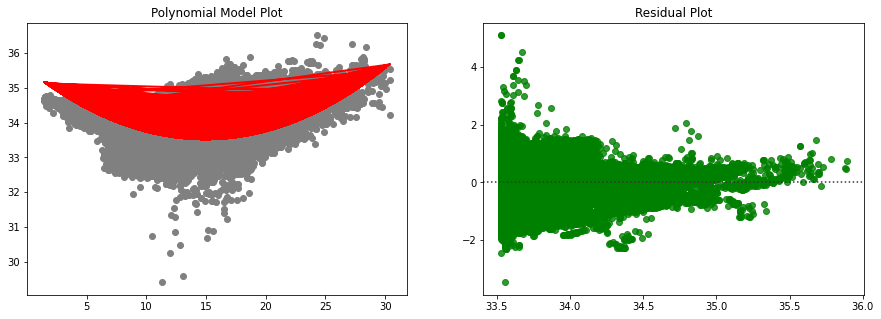

Intercept:  [35.54832431]
Coefficient:  [[ 0.         -0.26994413  0.00901989]]
Mean Absolute Error: 0.23318356023972164
Mean Squared Error: 0.11528373617480805
Root Mean Squared Error: 0.33953458759721084
R^2 value:  0.4572342059458382
Adjusted R^2 value:  1.0


In [29]:
# Try polynomial regression 
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 2) 
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)
model_poly = LinearRegression().fit(x_train_poly, y_train)

y_pred_poly = model_poly.predict(x_test_poly)
y_predicted_train_poly = model_poly.predict(x_train_poly)

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.scatter(x_test, y_test,  color='gray')
plt.plot(x_test, y_pred_poly, color='red', linewidth=2)
plt.title('Polynomial Model Plot')
plt.subplot(1,2,2)
sns.residplot(y_predicted_train_poly, (y_predicted_train_poly - y_train).reshape(-1,1) , color="g")
plt.title('Residual Plot')
plt.show()
print('Intercept: ',model_poly.intercept_)
print('Coefficient: ', model_poly.coef_)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_poly))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_poly))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly)))
print('R^2 value: ', model_poly.score(x_train_poly,y_train))
print('Adjusted R^2 value: ', 1 - (1-model_poly.score(x_train_poly,y_predicted_train_poly))*(len(y_predicted_train_poly)-1)/(len(y_predicted_train_poly)-x_train_poly.shape[1]-1))

In [ ]:
# Find correlations with other variables
sns.pairplot(bottle)

In [ ]:
# Plot heatmap
corr = bottle.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right');